# 🏋️‍♂️ Personalized Workout Recommendation System
**Machine Learning Project for Class**

---

## 📚 Introduction
The objective of this project is to develop a machine learning model that can predict **personalized workout recommendations** based on an individual's health and basic demographic information.

Using **multi-output classification**, the model predicts:
- 🏋️ Fitness Goal
- 🏃‍♂️ Fitness Type
- 🏋️‍♀️ Exercises
- 🏋️ Equipment

The system also uses **Collaborative Filtering** to recommend exercises based on similar users.

---

## 📊 Dataset
The dataset used is a real-world **gym recommendation dataset** containing:
- Demographic information (Sex, Age, Height, Weight)
- Health status (Hypertension, Diabetes)
- Derived health metrics (BMI)
- Target recommendations (Fitness Goal, Fitness Type, Exercises, Equipment)

The data was preprocessed to handle categorical variables and scaled to normalize the features.

---

## ⚙️ Approach

**Steps followed in the project:**
- 🛠️ One-Hot Encoding for categorical input features
- 🛠️ Label Encoding for multi-output target columns
- ⚖️ Feature Scaling using Standard Scaler
- 🔀 Train/Test Split (80% Training, 20% Testing)
- 🤖 Multi-Output Logistic Regression Model
- ✍️ Manual user input functionality for real-time predictions
- 🧩 Collaborative Filtering using K-Nearest Neighbors for exercise recommendation

---

## 🔥 Model Selection
- **Algorithm used:** Logistic Regression wrapped with `MultiOutputClassifier`
- Logistic Regression was chosen for its simplicity, interpretability, and suitability for classification tasks.
- Standard Scaler was used to ensure numerical feature values were normalized for better model performance.
- K-Nearest Neighbors (KNN) was used for collaborative filtering based on user similarity.

---

## 📈 Evaluation Metrics
The model is evaluated using:
- 🎯 Accuracy Score (for each output)
- 🎯 Classification Report (Precision, Recall, F1-Score)
- 🎯 Train vs Test Accuracy Comparison

These metrics help assess both performance and potential overfitting.

---

## 📥 Manual User Inputs
The user provides basic fitness and health details like:
- Sex
- Age
- Height (in meters)
- Weight (in kg)
- Hypertension status
- Diabetes status

The BMI is **automatically calculated** based on the entered height and weight.

Based on these inputs, the system predicts the best workout plan tailored to the user's profile and recommends exercises based on similar users.

---

## 🛠️ Libraries Used
```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import NearestNeighbors


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import NearestNeighbors


In [2]:
# 1. Load updated dataset
df = pd.read_excel("/content/gym recommendation.xlsx")

In [3]:
# 2. Select input features and targets
input_cols = ['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes', 'BMI']
target_cols = ['Fitness Goal', 'Fitness Type', 'Exercises', 'Equipment']

In [4]:
X = df[input_cols].copy()
y = df[target_cols].copy()

In [5]:

# 3. Encode categorical input and output features
categorical_input_cols = ['Sex', 'Hypertension', 'Diabetes']
categorical_target_cols = target_cols

In [6]:
# One-hot encode input categorical features
X_encoded = pd.get_dummies(X, columns=categorical_input_cols)

# Label encode output target columns
y_encoded = pd.DataFrame()
label_encoders = {}
for col in target_cols:
    le = LabelEncoder()
    y_encoded[col] = le.fit_transform(y[col])
    label_encoders[col] = le

In [7]:
# 4. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [8]:
# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [9]:
# 6. Train multi-output classifier
model = MultiOutputClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000))

In [10]:
# 7. Predict and evaluate
y_pred = model.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=target_cols)

In [11]:
for col in target_cols:
    print(f"\n=== Classification Report for {col} ===")
    print(classification_report(y_test[col], y_pred_df[col], zero_division=0))


=== Classification Report for Fitness Goal ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1439
           1       1.00      1.00      1.00      1479

    accuracy                           1.00      2918
   macro avg       1.00      1.00      1.00      2918
weighted avg       1.00      1.00      1.00      2918


=== Classification Report for Fitness Type ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1479
           1       1.00      1.00      1.00      1439

    accuracy                           1.00      2918
   macro avg       1.00      1.00      1.00      2918
weighted avg       1.00      1.00      1.00      2918


=== Classification Report for Exercises ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       774
           1       1.00      0.99      1.00       716
           2       1.00      1.00      1.0

In [12]:
# 8. Manual Input Prediction + Collaborative Filtering
# Fit KNN model for collaborative filtering
knn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn_model.fit(X_scaled)


NearestNeighbors(metric='euclidean')

In [13]:
def recommend_workout():
    print("\nEnter your fitness details:")
    user_input = {
        'Sex': input("Sex (Male/Female): "),
        'Age': int(input("Age: ")),
        'Height': float(input("Height (in meters, e.g., 1.75): ")),
        'Weight': float(input("Weight (in kg): ")),
        'Hypertension': input("Hypertension (Yes/No): "),
        'Diabetes': input("Diabetes (Yes/No): "),

    }
    user_input['BMI'] = round(user_input['Weight'] / (user_input['Height'] ** 2), 2)

    user_df = pd.DataFrame([user_input])
    user_df = pd.get_dummies(user_df)

    # Match training feature columns
    for col in X_encoded.columns:
        if col not in user_df.columns:
            user_df[col] = 0
    user_df = user_df[X_encoded.columns]

    user_scaled = scaler.transform(user_df)

    # ML model prediction
    prediction = model.predict(user_scaled)

    # Collaborative Filtering Recommendation
    distances, indices = knn_model.kneighbors(user_scaled)
    recommended_exercises = y.iloc[indices[0]]['Exercises']
    collaborative_recommendation = recommended_exercises.mode()[0]

    print("\n=== Predicted Personalized Workout Plan ===")
    for i, col in enumerate(target_cols):
        label = label_encoders[col].inverse_transform([prediction[0][i]])[0]
        print(f"{col}: {label}")

    print("\n=== Collaborative Filtering Recommendation ===")
    print(f"Recommended Exercises (based on similar users): {collaborative_recommendation}")


In [14]:
recommend_workout()


Enter your fitness details:
Sex (Male/Female): Male
Age: 22
Height (in meters, e.g., 1.75): 1.80
Weight (in kg): 82
Hypertension (Yes/No): No
Diabetes (Yes/No): No

=== Predicted Personalized Workout Plan ===
Fitness Goal: Weight Loss
Fitness Type: Cardio Fitness
Exercises: Brisk walking, cycling, swimming, running , or dancing.
Equipment: Ellipticals, Indoor Rowers,Treadmills, and Rowing machine

=== Collaborative Filtering Recommendation ===
Recommended Exercises (based on similar users): Brisk walking, cycling, swimming, running , or dancing.


In [15]:
# 10. Accuracy Summary
print("\n=== Accuracy Comparison ===")
for i, col in enumerate(target_cols):
    train_acc = accuracy_score(y_train[col], model.predict(X_train)[:, i])
    test_acc = accuracy_score(y_test[col], y_pred_df[col])
    print(f"{col} - Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")


=== Accuracy Comparison ===
Fitness Goal - Train Accuracy: 1.00, Test Accuracy: 1.00
Fitness Type - Train Accuracy: 1.00, Test Accuracy: 1.00
Exercises - Train Accuracy: 1.00, Test Accuracy: 1.00
Equipment - Train Accuracy: 0.88, Test Accuracy: 0.89


ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

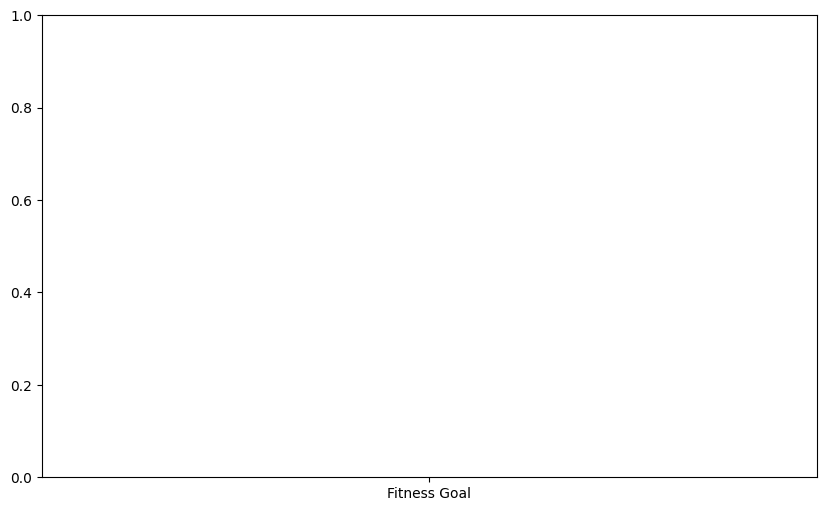

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 11. Plot Train vs Test Accuracy
categories = target_cols

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(categories, train_acc, marker='o', linestyle='-', label='Train Accuracy')
ax.plot(categories, test_acc, marker='s', linestyle='--', label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy (Overfitting Detection)')
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True)

for i, (train, test) in enumerate(zip(train_accuracies, test_accuracies)):
    ax.annotate(f'{train:.2f}', (categories[i], train), textcoords="offset points", xytext=(0,10), ha='center')
    ax.annotate(f'{test:.2f}', (categories[i], test), textcoords="offset points", xytext=(0,-15), ha='center')

plt.tight_layout()
plt.show()
